In [ ]:
import numpy as np

def MLP(entrada, saida):
    w = np.random.random([1, 6])
    erro = 0.01
    epoca = 0
    a = 0.1
    e = 0
    while erro <= e and epoca <= 10:
        for i in range(len(entrada - 1)):
            net11 = np.sum(entrada[i, 0] * w[0, 0]) + np.sum(entrada[i, 1] * w[0, 2])
            net12 = np.sum(entrada[i, 0] * w[0, 1]) + np.sum(entrada[i, 1] * w[0, 3])
            y11 = 1 / (1 + np.exp(-net11))
            y12 = 1 / (1 + np.exp(-net12))
            net2 = np.sum(y11 * w[0, 4]) + np.sum(y12 * w[0, 5])
            y2 = 1 / (1 + np.exp(-net2))
            e = saida[i] - y2
            s2 = y2 * (1 - y2) * e

            #calculo da sensibilidade

            s11 = y11 * (1 - y11) * w[0, 4] * s2
            s12 = y12 * (1 - y12) * w[0, 5] * s2

            #ajustes de peso
            w = np.array([[(w[0, 0] + (a * s11 * entrada[i, 0])),
                           (w[0, 1] + (a * s12 * entrada[i, 0])),
                           (w[0, 2] + (a * s11 * entrada[i, 1])),
                           (w[0, 3] + (a * s12 * entrada[i, 1])),
                           (w[0, 4] + (a * s2 * y11)),
                           (w[0, 5] + (a * s2 * y12))]])
          
    if erro <= 0.01 and epoca < 10:
        print("Rede Treinada com Sucesso em ", epoca, "epocas")
        print("O vetor de peso eh: ", w)
    else:
        print("Error", erro)



entrada = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
saida = np.array([[0], [1], [1], [0]])
MLP(entrada, saida)


Rede Treinada com Sucesso em  0 epocas
O vetor de peso eh:  [[0.59968019 0.87857408 0.29328299 0.63237746 0.53049495 0.93715671]]


In [1]:
#Analisar a base
import pandas as pd  
import seaborn as sb

url = "https://raw.githubusercontent.com/ryanfcc1701/automatic-doodle/main/mushrooms.csv"
coluna = ['class','cap-shape','cap-color','cap-surface','odor']
dataset = pd.read_csv(url,names=coluna,skiprows=0, delimiter=',')
dataset.head()

class  \
class cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing gill-size gill-color stalk-shape stalk-root stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring veil-type veil-color  ring-number   
p     x         s           n         t       p    f               c            n         k          e           e          s                        s                        w                      w                      p         w                     o   
e     x         s           y         t       a    f               c            b         k          e           c          s                        s                        w                      w                      p         w                     o   
      b         s           w         t       l    f               c            b         n          e           c          s                        s                        w                      w                      p         w                     o   
p     x         y           w         t       p    f               c            n         n          e           e          s                        s                        w                      w                      p         w                     o   

                                                                                                                                                                                                                                                  cap-shape  \
class cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing gill-size gill-color stalk-shape stalk-root stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring veil-type veil-color  ring-type   
p     x         s           n         t       p    f               c            n         k          e           e          s                        s                        w                      w                      p         w                   p   
e     x         s           y         t       a    f               c            b         k          e           c          s                        s                        w                      w                      p         w                   p   
      b         s           w         t       l    f               c            b         n          e           c          s                        s                        w                      w                      p         w                   p   
p     x         y           w         t       p    f               c            n         n          e           e          s                        s                        w                      w                      p         w                   p   

                                                                                                                                                                                                                                                          cap-color  \
class cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing gill-size gill-color stalk-shape stalk-root stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring veil-type veil-color  spore-print-color   
p     x         s           n         t       p    f               c            n         k          e           e          s                        s                        w                      w                      p         w                           k   
e     x         s           y         t       a    f               c            b         k          e           c          s                        s                        w                      w                      p         w                           n   
      b         s           w         t       l    f               c            b         n          e           c        

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1226
           p       1.00      1.00      1.00      1212

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

O acerto foi de:  1.0


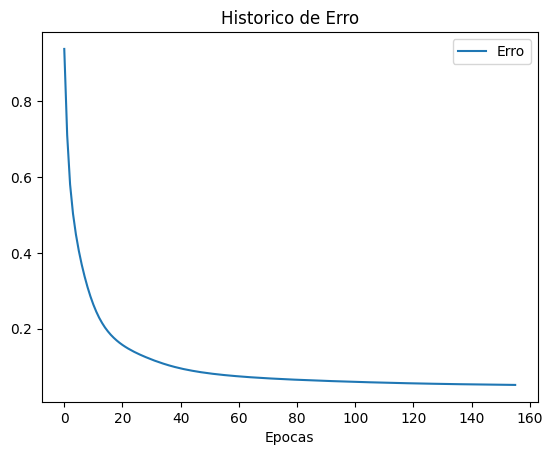

In [2]:
#MLP usando sklearn
import pandas as pd  
import numpy as np  
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/ryanfcc1701/automatic-doodle/main/mushrooms.csv"
new_names = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing',
             'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
             'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
             'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
dataset = pd.read_csv(url, names=new_names, skiprows=0, delimiter=',')
y = dataset['class']
x = dataset.drop(['class'], axis=1)
class_names = ['e', 'p']


x_encoded = pd.get_dummies(x, columns=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing',
             'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
             'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
             'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'])

x_train, x_test, y_train, y_test = train_test_split(x_encoded,y, test_size=0.3) #0.3 data as data test

#inicialização - Minha rede tera 4 entradas, 1º camada 10 neuronios, 2º camada 5 neuronios, saida com 3 neurios
Model = MLPClassifier(hidden_layer_sizes=(10,5), activation='tanh',max_iter=2000, alpha=0.4, 
                     solver='sgd', verbose=0,  random_state=121) # verbode=0 retira o log
#train
h = Model.fit(x_train,y_train)

y_pred=Model.predict(x_test)

print(classification_report(y_test, y_pred, target_names=class_names, zero_division=1)) # Print
print('O acerto foi de: ',accuracy_score(y_pred,y_test)) 

#plot

plt.plot(h.loss_curve_)
plt.title('Historico de Erro')
plt.xlabel('Epocas')
plt.legend(['Erro'])

              precision    recall  f1-score   support

           e       0.53      0.51      0.52      1260
           p       0.49      0.51      0.50      1178

    accuracy                           0.51      2438
   macro avg       0.51      0.51      0.51      2438
weighted avg       0.51      0.51      0.51      2438

O acerto foi de:  0.5110746513535686


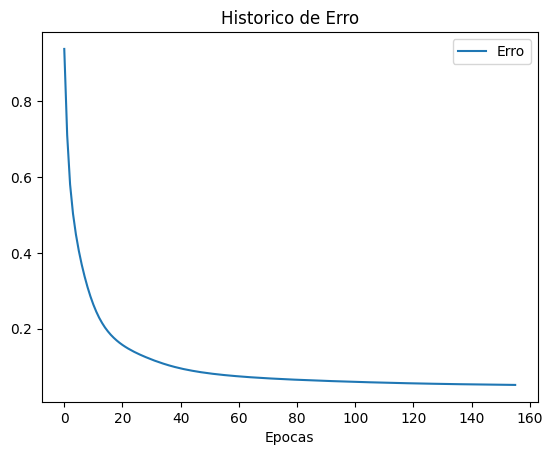

In [3]:
import pandas as pd  
import numpy as np  
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/ryanfcc1701/automatic-doodle/main/mushrooms.csv"
new_names = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing',
             'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
             'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
             'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
dataset = pd.read_csv(url, names=new_names, skiprows=0, delimiter=',')
y = dataset['class']
x = dataset.drop(['class'], axis=1)
class_names = ['e', 'p']


x_encoded = pd.get_dummies(x, columns=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing',
             'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
             'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
             'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'])

x_train, x_test, y_train, y_test = train_test_split(x_encoded,y, test_size=0.3) #0.3 data as data test

#inicialização - Minha rede tera 4 entradas, 1º camada 20 neuronios, 2º camada 10 neuronios, 3a com 5, saida com 3 neurônios
Model2 = MLPClassifier(hidden_layer_sizes=(20, 10, 5), activation='relu', max_iter=2000, alpha=0.001, solver='adam', random_state=42) # verbode=0 retira o log
#train
h2 = Model2.fit(x_train,y_train)

y_pred2=Model2.predict(x_test)

print(classification_report(y_test, y_pred, target_names=class_names, zero_division=1)) # Print
print('O acerto foi de: ',accuracy_score(y_pred,y_test))


#plot

plt.plot(h.loss_curve_)
plt.title('Historico de Erro')
plt.xlabel('Epocas')
plt.legend(['Erro'])